# 1. Clustering

Clustering, or cluster analysis, is a methodology that allows you to find groups of similar objects, objects that are more related to each other than to objects in other groups. In general tehre are several types of clustering, first group: hard and soft; another group: based on prototypes, based on density and hierarchical clustering.

## 1.1 Hard clustering

Assume, that we have $X=\{x_i\}^{N}_{i=1}$, $x_i \in R^p$ - set of vectors with $p$ features. We aim to extract from this set $\Omega = (C_1, C_2, C_3, ..., C_K)$ - partitions composed of $K$ classes.

Partitions - sets s.t. $\forall i,j$ $C_i \cap C_j = \varnothing$ and $\cup_{k} C_k = \{x_1, x_2, ... , x_k\}$.

Examples of algorithms: k-means, k-means +++, k-means mini-batch, DBSCAN, PAM

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from seaborn import scatterplot as scatter
from matplotlib import cm
%matplotlib inline

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
from fcmeans import FCM
from sklearn.metrics.pairwise import pairwise_distances_argmin

import warnings
warnings.simplefilter('ignore')

import time

## 1.2 Soft clustering

In hard clustering each sample in the data set is assigned strictly to one cluster. So when we say that $x_i$ is represented by $m_i$, we make an error equal to distance between $x_i$ and $m_i$.

If we don't want to hardly assigne each of the elements to 1 cluster, we can choose several representations of $x_i$, then we will now, that $x_i$ is 20% $C_1$, 30% $C_2$ and etc.

Fuzzy c-mean is very similar to k-means, but use another obective function. Suppose that we have all the same input as in the previous task, but now we will have martix $U$, which contains probability of each $x_i \in X$ belongs to cluster $C_1, C_2, C_3, ...$. And $(U_{i1}, U_{i2}, ... ,U_{ik})$ is vector of probability, that $x_i$ belongs to  $C_1, C_2, C_3, ...$, where $\sum\limits_{k=1}^{K}U_{ik} = 1$.
$$\min_{U =(m_1, ..., m_k)}\sum\limits_{k = 1}^{K}\sum\limits_{x_i \in C_k} (U_{ik})^\alpha ||x_i - m_k||^2,$$
where $\alpha$ is smootheness (fuzziness) parametr. $\alpha \geq 1$. If $\alpha = 1$ it leads to hard k-means, if $\alpha$ is growing, it leads to uniform weighing, leading to less clear clusters. In practice $\alpha = 2$ is usually used. 

The belonging of the sample to the class can be calculated as follows:
$$U_{ij} = \left[\sum\limits_{p=1}^{k} \left( \frac{||x_i-m_j||}{||x_i-m_p||}\right)^{\frac{2}{\alpha-1}}\right]^{-1}.$$

For the moment in sklearn there is no such algorithm. So we’ll use another [library](https://pypi.org/project/fuzzy-c-means/).

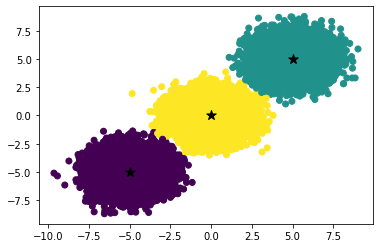

In [6]:
n_samples = 50000
random_state = 0
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
centers = [(-5, -5), (0, 0), (5, 5)]

x_soft, y_soft = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=random_state)

fcm = FCM(n_clusters=3)
fcm.fit(x_soft)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
plt.scatter(x_soft[:,0], x_soft[:,1], c=fcm_labels)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], s=100, marker='*', c='black', label = 'centroids')
plt.show()

In [7]:
fcm.u

array([[0.88769215, 0.01843871, 0.09386914],
       [0.76970506, 0.0328867 , 0.19740824],
       [0.89128756, 0.02122849, 0.08748394],
       ...,
       [0.00291252, 0.98592222, 0.01116526],
       [0.02303962, 0.87772625, 0.09923413],
       [0.01803904, 0.88419248, 0.09776848]])